In [1]:
%matplotlib inline
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
import feature_effect as fe
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.rcParams["figure.figsize"] = (15,10)

### Example

- $f(x_1, x_2) = x_1^2 + x_1^2x_2$
- $p(x_1, x_2) = \mathcal{U}(x_1; 0,1)\mathcal{N}(x_2; 0,1)$
- $\frac{\partial f}{\partial x_1} = 2x_1(1 + x_2)$
- $\frac{\partial f}{\partial x_2} = x_1^2$

In [2]:
def generate_samples(N, seed):
    if seed is not None:
        np.random.seed(seed)

    x1 = np.random.uniform(size=N)
    x2 = np.random.normal(size=N)
    return np.stack([x1, x2]).T


def f(x):
    return x[:,0]**2 + x[:,0]**2 * x[:,1]


def f_der(x):
    return np.stack([2*x[:,0]*(1 + x[:,1]), x[:,0]**2], axis=-1)

### Feature effects
- $f_{ALE}(x_1) = x_1^2$
- $f_{ALE}(x_2) = \frac{x_2}{3}$

##### Proofs

- $f_{ALE}(x_1) = \int_{0}^{x_1} \mathbb{E}_{x_2|x_1=z} [\frac{\partial f}{\partial x_1}] \partial z = \int_{0}^{x_1} \mathbb{E}_{x_2} [2z(1 + x_2)] \partial z = \int_{0}^{x_1} 2z (1 + \mathbb{E}_{x_2}[x_2]) \partial z = 2 \int_{0}^{x_1} z \partial z = x_1^2$
- $f_{ALE}(x_2) = \int_{0}^{x_2} \mathbb{E}_{x_1|x_2=z} [\frac{\partial f}{\partial x_2}] \partial z = \int_{0}^{x_2} \mathbb{E}_{x_1} [x_1^2] \partial z = \frac{1}{3}\int_{0}^{x_2}  \partial z = \frac{x_2}{3}$

In [3]:
def f_ale_x1(x1):
    z = 1/3
    return x1**2 - z

def f_ale_x2(x2):
    z = 0
    return x2/3 - z

#### Generate samples

In [4]:
seed = 21
N = 100
X = generate_samples(N, seed)
y = f(X)
dy = f_der(X)

# plt.figure()
# plt.plot(X[:,0], X[:,1], "ro")
# plt.show(block=False)

In [5]:
#### Define feature effect methods

In [6]:
ale = fe.ALE(data=X, model=f)
dale = fe.DALE(data=X, model=f, model_jac=f_der)

## Feature 1 - ALE

In [7]:
def plot(bins):
    ale.fit(features=[0, 1], k=bins)
    ale.plot(s=0, block=False, gt=f_ale_x1)
    plt.show()
    
interactive_plot = widgets.interactive(plot, bins=(1, 100, 1))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(IntSlider(value=50, description='bins', min=1), Output(layout=Layout(height='700px'))), …

## Feature 1 - DALE

In [8]:
def plot(bins):
    dale.fit(features=[0, 1], k=bins)
    dale.plot(s=0, block=False, gt=f_ale_x1)
    plt.show()

dale_plot = widgets.interactive(plot, bins=(1, 100, 1))
dale_output = interactive_plot.children[-1]
dale_output.layout.height = '350px'
dale_plot

interactive(children=(IntSlider(value=50, description='bins', min=1), Output()), _dom_classes=('widget-interac…

## Feature 1 - DALE - variable size

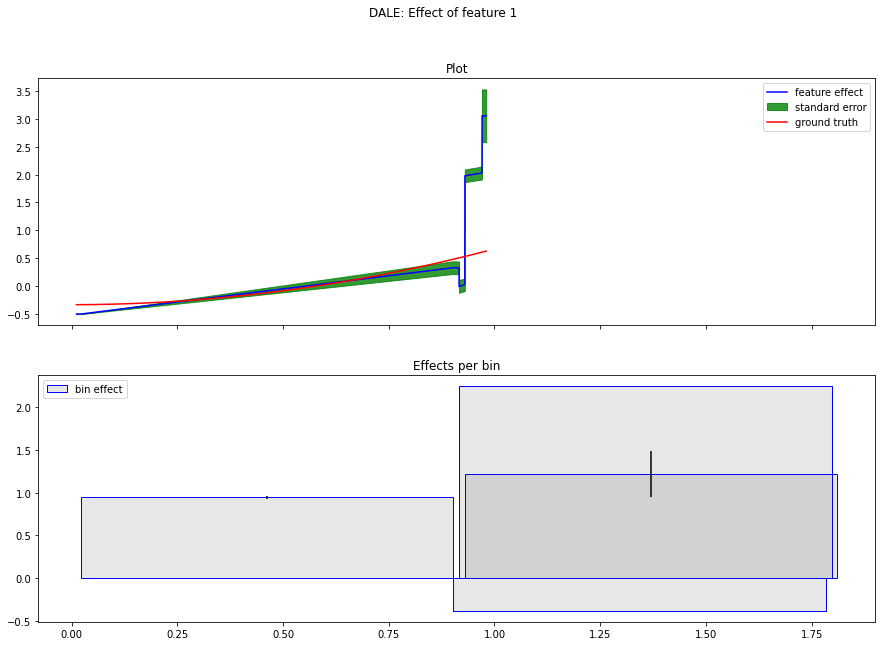

In [9]:
max_bins = 70
dale.fit(features=[0, 1], k=70, method="variable-size")
dale.plot(s=0, block=False, gt=f_ale_x1)
plt.show()

In [13]:
dale.parameters

{'feature_0': {'nof_bins': 50,
  'limits': array([0.02161625, 0.04059363, 0.059571  , 0.07854838, 0.09752576,
         0.11650314, 0.13548051, 0.15445789, 0.17343527, 0.19241265,
         0.21139003, 0.2303674 , 0.24934478, 0.26832216, 0.28729954,
         0.30627691, 0.32525429, 0.34423167, 0.36320905, 0.38218642,
         0.4011638 , 0.42014118, 0.43911856, 0.45809593, 0.47707331,
         0.49605069, 0.51502807, 0.53400544, 0.55298282, 0.5719602 ,
         0.59093758, 0.60991495, 0.62889233, 0.64786971, 0.66684709,
         0.68582446, 0.70480184, 0.72377922, 0.7427566 , 0.76173397,
         0.78071135, 0.79968873, 0.81866611, 0.83764348, 0.85662086,
         0.87559824, 0.89457562, 0.91355299, 0.93253037, 0.95150775,
         0.97048515]),
  'dx': 0.018977377508664156,
  'points_per_bin': array([2, 3, 2, 0, 0, 1, 1, 2, 3, 3, 1, 3, 1, 2, 5, 1, 2, 0, 3, 3, 3, 1,
         1, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 3, 0, 3, 5, 3, 3,
         5, 2, 3, 2, 0, 1]),
  'is_bin_empty': a

#### Feature 2

In [10]:
def plot(bins):
    ale.fit(features=[0, 1], k=bins)
    ale.plot(s=1, block=False, gt=f_ale_x2)
    plt.show()
    
interactive_plot = widgets.interactive(plot, bins=(1, 100, 1))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(IntSlider(value=50, description='bins', min=1), Output(layout=Layout(height='700px'))), …

In [11]:
dale = fe.DALE(data=X, model=f, model_jac=f_der)
def plot(bins):
    dale.fit(features=[0, 1], k=bins)
    dale.plot(s=1, block=False, gt=f_ale_x2)
    plt.show()

interactive_plot = widgets.interactive(plot, bins=(1, 100, 1))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(IntSlider(value=50, description='bins', min=1), Output(layout=Layout(height='700px'))), …

#### Generic Estimator

In [12]:
est = fe.Estimator(data=X, model=f, model_jac=f_der)

def plot(bins):
    est.fit(features=[0,1], method="all", nof_bins=bins)
    est.plot(feature=0, method="all", ale_gt=f_ale_x1)
    plt.show()

interactive_plot = widgets.interactive(plot, bins=(1, 100, 1))
output = interactive_plot.children[-1]
output.layout.height = '800px'
interactive_plot

interactive(children=(IntSlider(value=50, description='bins', min=1), Output(layout=Layout(height='800px'))), …